In [1]:
import os
import csv
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iSCAMS_class import iSCAMS
from iSCAMS_calibration import iSCAMS_calibrate
from astroML.plotting import hist
from numpy.polynomial.polynomial import polyfit

In [2]:
Path = r"./Contrasts/Standards/CHV_CupA/"
Filenames = []
for filename in os.listdir(Path):
    filename_sample = os.path.join(os.path.expanduser(Path),filename)
    assert os.path.exists(filename_sample)
    Filenames.append(filename_sample)
    
print("Standard Files:",Filenames)

Standard Files: ['./Contrasts/Standards/CHV_CupA/ADH_100nM_1_Cf.npy', './Contrasts/Standards/CHV_CupA/ADH_100nM_Cf.npy', './Contrasts/Standards/CHV_CupA/BetaA_100nM_Cf.npy']


In [3]:
Cf_ADH = np.load(Filenames[0])
ADH_cal = iSCAMS_calibrate(Cf_ADH,"ADH")
Cf_BetaA = np.load(Filenames[2])
BetaA_cal = iSCAMS_calibrate(Cf_BetaA,"BetaA")

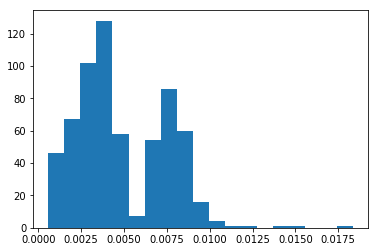

Number of Gaussians:
2
Gaussian 1
Centre:
0.003
Amplitude:
120
Width:
0.001
Gaussian 2
Centre:
0.0075
Amplitude:
80
Width:
0.001


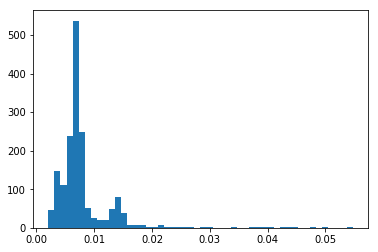

Number of Gaussians:
2
Gaussian 1
Centre:
0.006
Amplitude:
500
Width:
0.001
Gaussian 2
Centre:
0.015
Amplitude:
100
Width:
0.001


In [4]:
ADH_cal.Manual_Gauss()
BetaA_cal.Manual_Gauss()

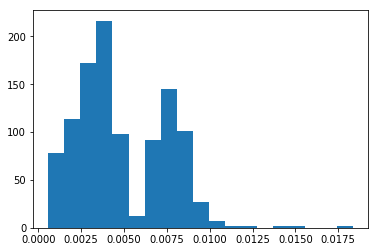

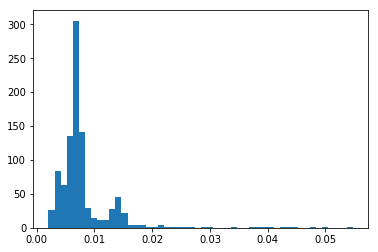

In [5]:
ADH_cal.Fit_Gaussian()
BetaA_cal.Fit_Gaussian()

In [6]:
x = []
y = []
for i in range(0,len(ADH_cal.popt),3):
    x.append(ADH_cal.popt[i])
for pk in ADH_cal.Peaks:
    y.append(pk)

for i in range(0,len(BetaA_cal.popt),3):
    x.append(BetaA_cal.popt[i])
for pk in BetaA_cal.Peaks:
    y.append(pk)
print(x,y)

[0.0032895452810403967, 0.007744450846129352, 0.006784363337688719, 0.013988567201128833] [73.5, 147, 112, 224]


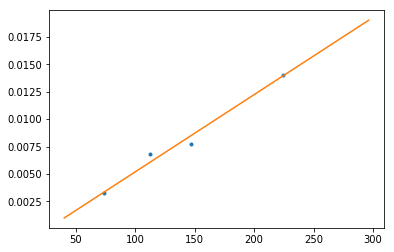

Gradient: 14237.875265229435
Intercept: 25.909236389843244


In [7]:
b, m = polyfit(x,y, 1)

y_n = np.arange(0.001,0.02,0.001)
x_n = b + m*y_n

plt.plot(y, x, '.')
plt.plot(x_n, y_n, '-')
plt.show()

print("Gradient:",m)
print("Intercept:",b)